<a href="https://colab.research.google.com/github/MatousE/learning_nevopy/blob/main/nevopy_xnor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nevopy

In [2]:
import nevopy as ne
import numpy as np

In [14]:
# building the dataset
xnor_inputs, _ = ne.utils.make_xor_data(2)
xnor_outputs = np.array([1,0,0,1])

# visualizing
for x, y in zip(xnor_inputs, xnor_outputs):
    print(f"{x} -> {y}")

[0 0] -> 1
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


In [17]:
def fitness_function(genome, log=False):
    """ Implementation of the fitness function we're going to use.

    It simply feeds the XOR inputs to the given genome and calculates how well
    it did (based on the squared error).
    """
    # Shuffling the input, in order to prevent our networks from memorizing the
    # sequence of the answers.
    idx = np.random.permutation(len(xnor_inputs))
    
    error = 0
    for x, y in zip(xnor_inputs[idx], xnor_outputs[idx]):
        # Resetting the cached activations of the genome (optional).
        genome.reset()

        # Feeding the input to the genome. A numpy array with the value 
        # predicted by the neural network is returned.
        h = genome.process(x)[0]

        # Calculating the squared error.
        error += (y - h) ** 2

        if log:
            print(f"IN: {x}  |  OUT: {h:.4f}  |  TARGET: {y}")

    if log:
        print(f"\nError: {error}")

    return (1 / error) if error > 0 else 0

In [18]:
class RandomAgent:
    def reset(self):
        pass

    def process(self, x):
        y = np.random.randint(2)
        print(y)
        return np.array([y])

v = fitness_function(RandomAgent(), log=True)
print(f"Fitness: {v:2f}")

0
IN: [1 1]  |  OUT: 0.0000  |  TARGET: 1
1
IN: [0 1]  |  OUT: 1.0000  |  TARGET: 0
1
IN: [1 0]  |  OUT: 1.0000  |  TARGET: 0
1
IN: [0 0]  |  OUT: 1.0000  |  TARGET: 1

Error: 3
Fitness: 0.333333


In [24]:
population = ne.neat.NeatPopulation(
    size=500,
    num_inputs=len(xnor_inputs[0]),
    num_outputs=1
)

In [25]:
history = population.evolve(generations=100,
                            fitness_function=fitness_function)

>> GENERATION 100 SUMMARY:
. Mass extinction counter: 0 / 15
. Processing time:  0.9965s

|---------------|--------------|--------------|--------------|--------------|
|     NAME      |   CURRENT    |     PAST     |   INCREASE   | INCREASE (%) |
|===========================================================================|
| Best fitness  |   6.64E+47   |   4.09E+47   |  +2.55E+47   |   +62.39%    |
|---------------|--------------|--------------|--------------|--------------|
|Avg population |   1.90E+46   |   8.18E+44   |  +1.81E+46   |  +2216.73%   |
|    fitness    |              |              |              |              |
|---------------|--------------|--------------|--------------|--------------|
|    Weight     |    70.00%    |    70.00%    |    +0.00%    |      -       |
|mutation chance|              |              |              |              |
|---------------|--------------|--------------|--------------|--------------|
|    Weight     |    10.00%    |    10.00%    |    +

In [26]:
best_genome = population.fittest()
fitness_function(best_genome, log=True)

IN: [1 0]  |  OUT: 0.0000  |  TARGET: 0
IN: [1 1]  |  OUT: 1.0000  |  TARGET: 1
IN: [0 0]  |  OUT: 1.0000  |  TARGET: 1
IN: [0 1]  |  OUT: 0.0000  |  TARGET: 0

Error: 1.5051411715811004e-48


6.643895063673884e+47

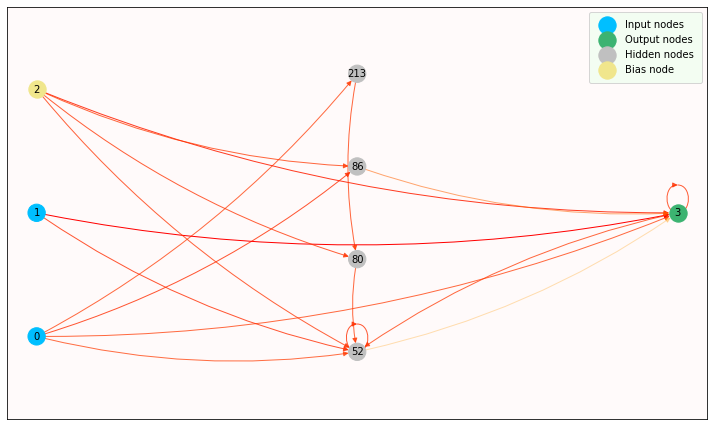

In [27]:
best_genome.visualize()